# Loan Data Set Exploration

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import matplotlib
import matplotlib.pyplot as pp
import seaborn as sns

from string import ascii_letters
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid')

In [2]:
loan = pd.read_csv('loan.csv', dtype={'Current Credit Balance': 'int64'})

C:\Users\imran\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
loan.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
loan.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


## Step 1: Cleaning the Dataframe

### Credit Score: Dealing with missing values

In [6]:
loan.isna().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

* Credit score: 61676 missing entries, that's a significant propportion of the data. Dropping the rows is not a good option in this case. We will replace those with the mean credit score.

In [7]:
loan['Credit Score'] = loan['Credit Score'].fillna(loan['Credit Score'].mean())


In [8]:
loan['Credit Score'].isna().sum()

0

### Years in current job

* There are 11476 missing entries
* We can change it to integer, by dropping the '+ years' part of the entry and any other invalud string

In [9]:
loan['Years in current job'] = loan['Years in current job'].str.strip(r'+ years').replace('< 1', '1').fillna(0)

In [10]:
loan['Years in current job'] = loan['Years in current job'].astype(int)

In [11]:
loan['Years in current job'].describe()

count    256984.000000
mean          5.689058
std           3.632340
min           0.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Years in current job, dtype: float64

### Annual Income
* There are 61676 missing entries, the same number of missing entries as Credit Score. Similaliry, we can fill these with the mean.

In [12]:
loan['Annual Income'] = loan['Annual Income'].fillna(loan['Annual Income'].mean())

In [13]:
loan['Annual Income'].isnull().sum()

0

### Months since last delinquent 

* 140383 nan entries for Months since last delinquent.
* Looking at the data, it can be result of not having any late payments, therefore we can replace it with 0.

In [14]:
loan['Months since last delinquent']= loan['Months since last delinquent'].fillna(0)

In [15]:
loan['Months since last delinquent'].isnull().sum()

0

### Bankruptcies

* 529 missing entries, we can fill it with 0 as the mean is 0.11

In [16]:
loan['Bankruptcies'] = loan['Bankruptcies'].fillna(0)

### Tax Liens
* Only 29 missing entries, with mean of 0.02, we will fill it with 0

In [17]:
loan['Tax Liens'] = loan['Tax Liens'].fillna(0)

In [18]:
loan.isna().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

* We have completed filling all the missing entries

### Duplicate records

* There are 215700 unique records for 'Loan ID' and 'Customer ID', resulting in 41284 duplicate records in the dataset to be removed.

In [19]:
loan['Loan ID'].nunique()

215700

In [20]:
loan['Customer ID'].nunique()

215700

In [21]:
loan.drop_duplicates(subset=['Loan ID', 'Customer ID'], inplace=True)

In [22]:
loan.value_counts().sum()

215700

### Correcting dtypes

* Monthly Debt column contains '$' signs in the begining of the recods
* Maximum Open Credit has #VALUE! as entry

In [23]:
loan['Monthly Debt'] = loan['Monthly Debt'].str.strip(r'$')

In [24]:
loan['Monthly Debt'][0]

'584.03'

In [25]:
loan['Monthly Debt'] = loan['Monthly Debt'].apply( lambda x:   x.replace(',', ''))

In [26]:
loan['Monthly Debt'] = loan['Monthly Debt'].astype(float)

#### Correcting Maximum Open Credit

In [27]:
loan['Maximum Open Credit'] = loan['Maximum Open Credit'].str.strip(r'#VALUE!')

In [28]:
loan['Maximum Open Credit'] = loan['Maximum Open Credit'].replace('', 0).astype(float)

### Correcting purpose entries

In [29]:
loan['Purpose'].value_counts(normalize=True)

Debt Consolidation      0.793213
Home Improvements       0.059527
other                   0.054363
Other                   0.038391
Business Loan           0.016741
Buy a Car               0.013565
Medical Bills           0.011011
Take a Trip             0.006083
Buy House               0.006064
Educational Expenses    0.001043
Name: Purpose, dtype: float64

* There are two 'Other' entries for purpose, one with a capital and one without. We will map them into one.

In [42]:
loan['Purpose'] = loan['Purpose'].replace(['Other', 'other'], 'Other Reasons')

In [43]:
loan['Purpose'].value_counts(normalize=True)

Debt Consolidation      0.793165
Other Reasons           0.092723
Home Improvements       0.060119
Business Loan           0.015979
Buy a Car               0.013917
Medical Bills           0.010896
Take a Trip             0.006106
Buy House               0.006042
Educational Expenses    0.001053
Name: Purpose, dtype: float64

### Outliers

<AxesSubplot:xlabel='Credit Score'>

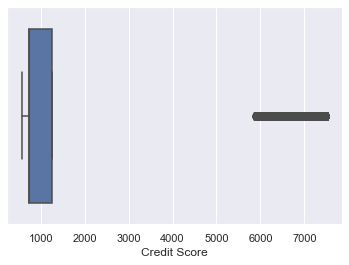

In [32]:
sns.boxplot(x=loan['Credit Score'])

* Above plot shows block of entries for credit score around 6000 to 8000, these are outliers as there not included in the box of other observations (near the quartiles).

In [33]:
credit_outlier = loan[loan['Credit Score'] > 5000].count()[0]
credit_in = loan[loan['Credit Score'] < 2000].count()[0]
credit_outlier, credit_in

(14433, 201267)

* There are 14,433 records that have credit score above 5000 and 201, 267 entries below credit score of 2000
* There's no credit score entries between 2000 and 5000, indicating that there is an issue here.
* One explaination could be that the records are from different credit agencies with different credit scoring range, we will remove the records above 2000 Credit Score.

In [34]:
loan = loan[loan['Credit Score'] < 2000]

In [35]:
loan.shape

(201267, 19)

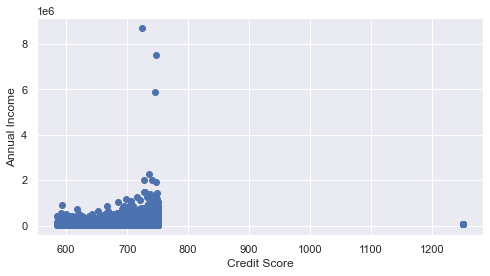

In [46]:
fig, ax = pp.subplots(figsize=(8,4))
ax.scatter(loan['Credit Score'], loan['Annual Income'])
ax.set_xlabel('Credit Score')
ax.set_ylabel('Annual Income')
pp.show()

* There's still an empty gap between the records in the range of 550-750 and 1200+
* Research shows that most credit scores are in the range of 350 and 850

In [48]:
loan[loan['Credit Score'] > 850].count()[0]

55008

In [49]:
loan = loan[loan['Credit Score'] <=  850]
loan.shape

(146259, 19)

## Part 2: Exploratory Data Analysis 

* Plotting a diagonal correlation matrix

<AxesSubplot:>

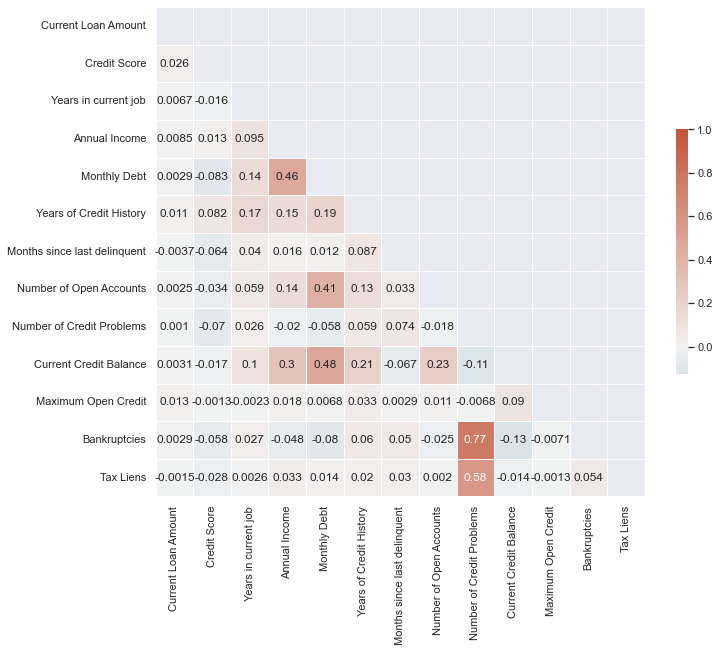

In [50]:
#Matrix correlation
corr = loan.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = pp.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax = 1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)

* The correlation map shows the strength of linear relationship between two variables.
* Right from the start, you can see there is a positive strong correlation between Bankruptcies and Number of Credit Problems. 
* There is also strong correlation between Monthly Debt and Current Credit Balance and Number of Open Accounts.
* Majority of other variables have no relationship

### Histogram of Credit Score and Purpose

In [ ]:
ax = sns.histplot(data=loan, x='Credit Score', hue='Purpose', multiple='stack')

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

* The diagram shows majority of credit scores are in the range of 700 to 800 and just above 1200.
* The diagram also shows that the main purpose of the credit loans are debt consolidation
* Debt consolidation is a form of debt refinancing that entails taking out one loan to pay off many others. This commonly refers to a personal finance process of individuals addressing high consumer debt, but occasionally it can also refer to a country's fiscal approach to consolidate corporate debt or government debt

In [39]:
loan['Purpose'].value_counts(normalize=True)

Debt Consolidation      0.793165
Home Improvements       0.060119
other                   0.053973
Other                   0.038750
Business Loan           0.015979
Buy a Car               0.013917
Medical Bills           0.010896
Take a Trip             0.006106
Buy House               0.006042
Educational Expenses    0.001053
Name: Purpose, dtype: float64

<AxesSubplot:xlabel='Years in current job', ylabel='Count'>

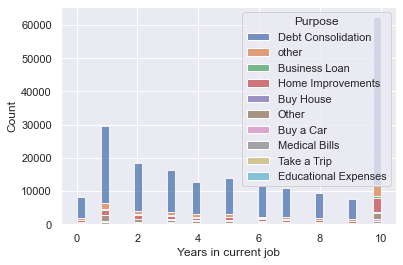

In [40]:
sns.histplot(data=loan, x='Years in current job', hue='Purpose', multiple='stack')

<AxesSubplot:xlabel='Years in current job', ylabel='Density'>

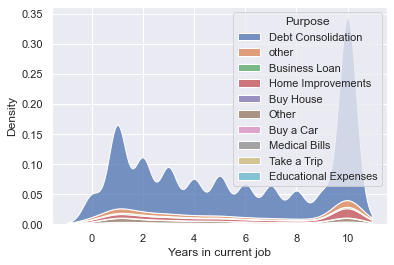

In [41]:
sns.kdeplot(data=loan, x='Years in current job', hue='Purpose', multiple='stack')